## Grover's Benchmark

Notes :
1. using `grovers_benchmark.GroversBenchmark()` the amonunt of time required to generate the initial circuit grows exponentially with the number of qubits. Maybe there is a better way of doing it?
2. for `num_qubits<5` raises a `GateNotImplementeError` in lsc-compiler stack

In [1]:
from grover import run
import numpy as np
import matplotlib.pyplot as plt

In [25]:
for num_qubits in range(3,5):
    run(num_qubits)

Generated: 254 lines, 4457 chars for mnemonics and 1710 for shorthand LS
Time to generate: 0.0032079219818115234s


QasmParseException: Instruction p(pi/8) with args ['q395[0]'] not implemented

In [5]:
benchmark_data = []
for num_qubits in range(5,11):
    benchmark_data.append(run(num_qubits))

print(benchmark_data)

Generated: 2450 lines, 42384 chars for mnemonics and 17863 for shorthand LS
Time to generate: 0.03986978530883789s
Generated: 6900 lines, 122590 chars for mnemonics and 54328 for shorthand LS
Time to generate: 0.11157417297363281s
Generated: 18462 lines, 337609 chars for mnemonics and 154038 for shorthand LS
Time to generate: 0.2674829959869385s
Generated: 55384 lines, 1025240 chars for mnemonics and 473096 for shorthand LS
Time to generate: 1.4293100833892822s
Generated: 156962 lines, 2982969 chars for mnemonics and 1415822 for shorthand LS
Time to generate: 3.2926597595214844s
Generated: 461320 lines, 8863182 chars for mnemonics and 4253872 for shorthand LS
Time to generate: 10.169681072235107s
[{'num_qubits': 5, 'lines': 2450, 'chars_full': 42384, 'chars_sh': 17863, 'time': 0.03994250297546387}, {'num_qubits': 6, 'lines': 6900, 'chars_full': 122590, 'chars_sh': 54328, 'time': 0.1116032600402832}, {'num_qubits': 7, 'lines': 18462, 'chars_full': 337609, 'chars_sh': 154038, 'time': 0.2

In [6]:
print(benchmark_data)

[{'num_qubits': 5, 'lines': 2450, 'chars_full': 42384, 'chars_sh': 17863, 'time': 0.03994250297546387}, {'num_qubits': 6, 'lines': 6900, 'chars_full': 122590, 'chars_sh': 54328, 'time': 0.1116032600402832}, {'num_qubits': 7, 'lines': 18462, 'chars_full': 337609, 'chars_sh': 154038, 'time': 0.2675032615661621}, {'num_qubits': 8, 'lines': 55384, 'chars_full': 1025240, 'chars_sh': 473096, 'time': 1.4296693801879883}, {'num_qubits': 9, 'lines': 156962, 'chars_full': 2982969, 'chars_sh': 1415822, 'time': 3.2926807403564453}, {'num_qubits': 10, 'lines': 461320, 'chars_full': 8863182, 'chars_sh': 4253872, 'time': 10.16970181465149}]


In [8]:
b_data_np = np.array([list(dic.values()) for dic in benchmark_data])

In [9]:
b_data_np[:,0]

array([ 5.,  6.,  7.,  8.,  9., 10.])

Text(0.5, 0.98, 'Grover Benchmark')

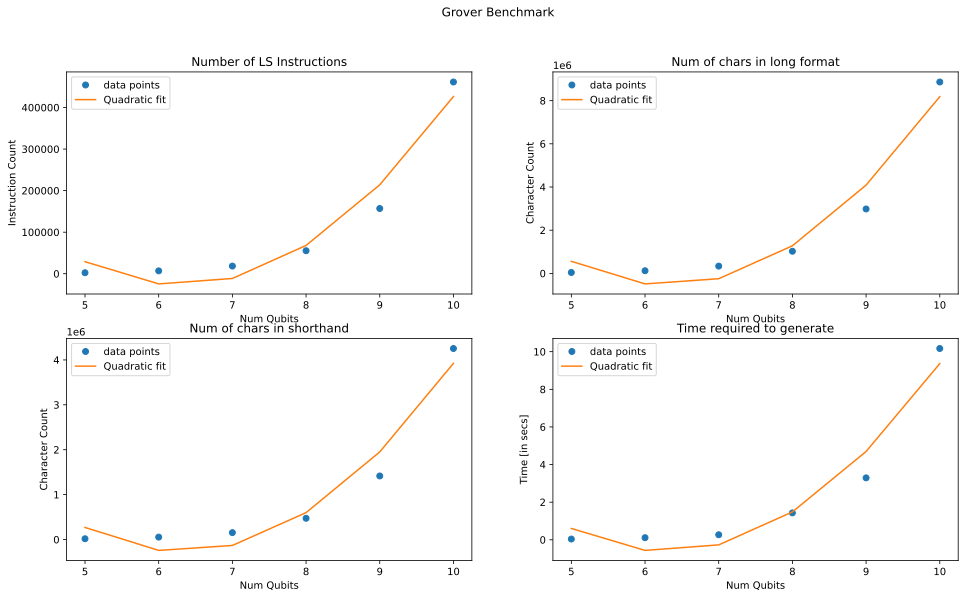

In [24]:
fig, axs = plt.subplots(2,2, figsize = (16,9))
titles = ["Number of LS Instructions", "Num of chars in long format", "Num of chars in shorthand", "Time required to generate"]
ylabels = ["Instruction Count", "Character Count", "Character Count", "Time [in secs]"]
for i,ax in enumerate(axs.flatten()):
    ax.plot(b_data_np[:,0], b_data_np[:,i+1], 'o', label ="data points")
    popt, _ = curve_fit(fit_func, b_data_np[:,0], b_data_np[:,i+1])
    ax.plot(new_x, fit_func(new_x,*popt),  label = f"Quadratic fit")
    # ax.plot()
    ax.set_title(titles[i])
    ax.set_xlabel("Num Qubits")
    ax.set_ylabel(ylabels[i])
    ax.legend()
fig.suptitle("Grover Benchmark")
# plt.legend()
# plt.plot(b_data_np[:,0], b_data_np[:,2], label  ="long char count")
# plt.plot(b_data_np[:,0], b_data_np[:,3], label  ="short char count")
# plt.plot(b_data_np[:,0], b_data_np[:,3], label  ="time")

In [15]:
def fit_func(x,a,b, c):
    return a* (x+b)**2 + c

from scipy.optimize import curve_fit
new_x = np.arange(5, 11)

The fit function might not be the right one. Should maybe do interpolate and guess the polynamial?
